In [1]:
import pandas as pd
import numpy as np

## Recaptulação

### Leitura dos dados

Base de dados do SUS, adquirida pelo tabnet, contendo as informações de investimentos em procedimentos hospitalares por mês de atendimento.

In [2]:
dados = pd.read_csv('../Dados/UF_AnoMesAtend_ValorTotal.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### tratamento inicial

Parte usada para adicionar a média dos valores investidos, na coluna de agosto do Acre

In [3]:
# Seleção do Acre e adicionando o valor NaN ao seu valor '-'
tratamento = dados.loc[1]
tratamento.replace('-', np.nan, inplace = True)

C:\Users\Kaiqu\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
# adicionando o valor 0 a os valores nan
tratamento.fillna(0, inplace = True)

C:\Users\Kaiqu\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [5]:
# Usado parra arredondar seu valor, com base em seus ultimos valores, setados como float e inserção da média.
valor = round(tratamento.tail(-1).astype('float').mean(), 2)
valor

3015541.5

In [6]:
# usado para fazer o replace dos valores '-' na base original
dados['2020/Ago'].replace('-', valor, inplace = True)

In [7]:
# convertendo a coluna em float
dados['2020/Ago'] = dados['2020/Ago'].astype('float')

### Seleção de colunas utilizaveis

In [8]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [9]:
dados_usaveis = dados[colunas_usaveis].sort_values('Total', ascending = False)

In [10]:
# Deixar a UF como index da base de dados
dados_usaveis.set_index('Unidade da Federação', inplace = True)

In [11]:
dados_usaveis.drop('Total', 1, inplace = True)

### Plotando gráfico de barras do mês mais recente

In [12]:
mais_recente = dados_usaveis.columns[-1]
interesse = dados_usaveis[mais_recente]
interesse.head()

Unidade da Federação
35 São Paulo            1.404149e+08
31 Minas Gerais         5.747370e+07
41 Paraná               4.154240e+07
43 Rio Grande do Sul    2.834926e+07
33 Rio de Janeiro       3.626432e+07
Name: 2020/Ago, dtype: float64

In [13]:
import matplotlib.ticker as ticker
import seaborn as sns

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

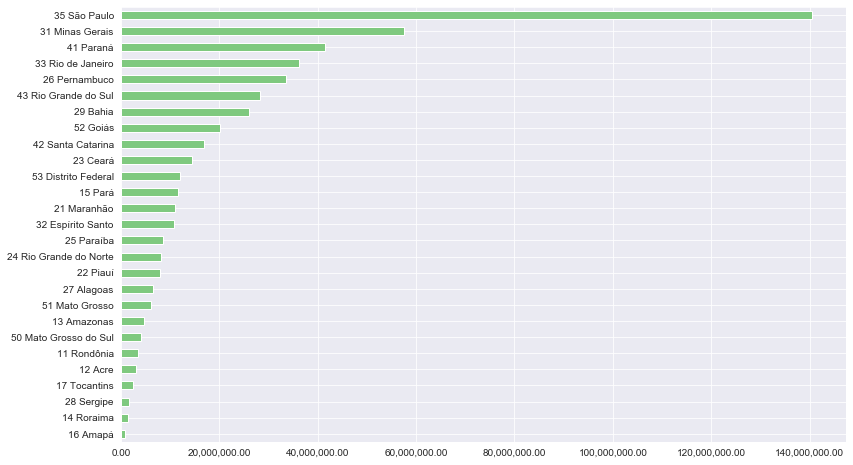

In [15]:
ax = interesse.sort_values(ascending = True).T.plot(kind = 'barh', figsize=(13,8))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('');

# Inicio modulo II

## Parte I

In [16]:
# fazer uma comparação do gasto per capta, qual porcentagem foi distribuida para X estado do valor total investido.
proporcional = interesse / interesse.sum()
round(proporcional, 2)

Unidade da Federação
35 São Paulo              0.27
31 Minas Gerais           0.11
41 Paraná                 0.08
43 Rio Grande do Sul      0.05
33 Rio de Janeiro         0.07
29 Bahia                  0.05
26 Pernambuco             0.06
42 Santa Catarina         0.03
23 Ceará                  0.03
52 Goiás                  0.04
15 Pará                   0.02
21 Maranhão               0.02
32 Espírito Santo         0.02
24 Rio Grande do Norte    0.02
25 Paraíba                0.02
53 Distrito Federal       0.02
50 Mato Grosso do Sul     0.01
22 Piauí                  0.02
27 Alagoas                0.01
51 Mato Grosso            0.01
13 Amazonas               0.01
28 Sergipe                0.00
17 Tocantins              0.00
11 Rondônia               0.01
12 Acre                   0.01
14 Roraima                0.00
16 Amapá                  0.00
Name: 2020/Ago, dtype: float64

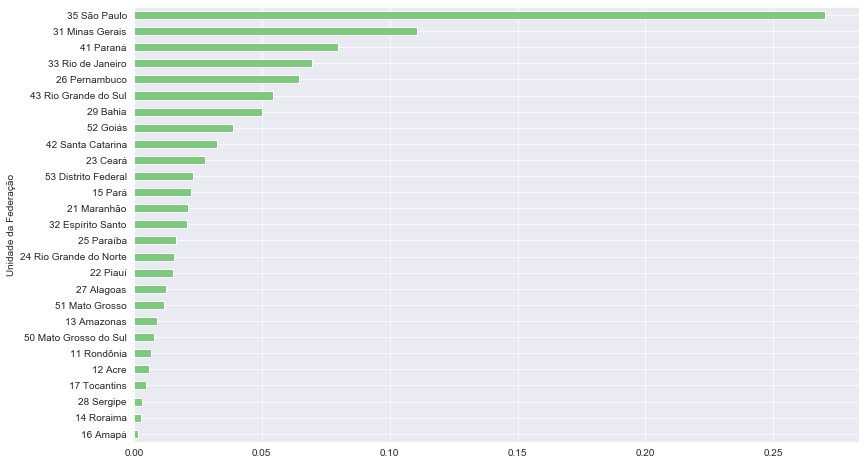

In [17]:
# O gráfico é exatamente o mesmo que o anterior(como esperado), mas assim fica mais fácil a comparação de um todo
proporcional.sort_values(ascending = True).T.plot(kind='barh', figsize = (13,8))

### Estimativa de população segundo IBGE

In [18]:
estimativa_populacional = pd.read_excel('../Dados/estimativa_dou_2020.xls', skipfooter=7, skiprows=1, convert_float = True)
estimativa_populacional.set_index('BRASIL E UNIDADES DA FEDERAÇÃO', inplace = True)

In [19]:
estimativa_populacional.drop('Unnamed: 1', 1, inplace = True)

In [20]:
estimativa_populacional.head()

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Brasil,211755692
Região Norte,18672591
Rondônia,1796460
Acre,894470
Amazonas,4207714


In [21]:
estimativa_populacional['POPULAÇÃO ESTIMADA'].replace({r"[(.)]+" : ''}, regex = True, inplace = True)

In [22]:
estimativa_populacional['POPULAÇÃO ESTIMADA'] = estimativa_populacional['POPULAÇÃO ESTIMADA'].astype('int')

In [23]:
estimativa_populacional.head()

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Brasil,211755692
Região Norte,18672591
Rondônia,1796460
Acre,894470
Amazonas,4207714


### outro tipo de leitura

In [24]:
dados_wikipedia = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	 Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	 Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

#Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

### leitura com IO

In [25]:
from io import StringIO

In [26]:
dados_wikipedia_io = StringIO(dados_wikipedia)

In [27]:
# Aqui foi declarado que o leitor de centenas fosse visto como um espaço, e isso ja cuidou de deixar nossos numeros inteiros.
df_wiki = pd.read_csv(dados_wikipedia_io, sep='\t', thousands = ' ')

outra forma de como fazer essa conversao dos dados, seria a seguinte:<br>
    df_wiki['População'] = df_wiki['População'].str.replace(' ', '').astype('int')

In [28]:
df_wiki.drop(0, inplace = True)

In [29]:
df_wiki.drop('País comparável', 1, inplace=  True)
df_wiki.drop('Posição', 1, inplace = True)
df_wiki.drop('% da pop. total', 1, inplace=True)
df_wiki['População'] = df_wiki['População'].astype('float')
novo_indice = {'Unidade federativa':'uf' ,'População':'populacao'}
df_wiki.rename(columns = novo_indice, inplace = True)

In [30]:
# ordenando a leitura a esquerda
#df_wiki.style.set_table_styles([dict(selector = 'th', props = [('text-allign', 'left')]),
#                               dict(selector = 'td', props = [('text-allign', 'left')])])

In [31]:
# Setando o uf como indice
df_wiki.set_index('uf', inplace = True)

### Juntando as tabelas

In [32]:
# realizado slice para a remoção dos 3 primeiros caracteres para poder fazer o join
interesse.index = interesse.index.str[3:]
interesse.head()

Unidade da Federação
São Paulo            1.404149e+08
Minas Gerais         5.747370e+07
Paraná               4.154240e+07
Rio Grande do Sul    2.834926e+07
Rio de Janeiro       3.626432e+07
Name: 2020/Ago, dtype: float64

In [33]:
# ainda é necessário fazer mais um "slice", neste caso, é para a remoção dos espaços presentes nos nomes
df_wiki.index = df_wiki.index.str.strip()
interesse.head()

Unidade da Federação
São Paulo            1.404149e+08
Minas Gerais         5.747370e+07
Paraná               4.154240e+07
Rio Grande do Sul    2.834926e+07
Rio de Janeiro       3.626432e+07
Name: 2020/Ago, dtype: float64

In [34]:
for estado in interesse.index:
    df_wiki.index = df_wiki.index.str.replace(f"{estado} {estado}", estado)

### Parte II proporcionalidades e Seaborn

In [35]:
gasto_mensal_habitante = df_wiki.join(round(interesse))
gasto_mensal_habitante.head()

,populacao,2020/Ago
uf,,
São Paulo,46289333.0,140414945.0
Minas Gerais,21331292.0,57473699.0
Rio de Janeiro,17366189.0,36264323.0
Bahia,14930634.0,26023559.0
Paraná,11516840.0,41542401.0


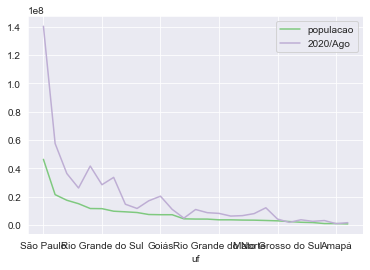

In [36]:
gasto_mensal_habitante.plot()

In [37]:
#pegaremos a proporcao dos gastos por habitantes, criando uma nova coluna
gasto_mensal_habitante['gasto por habitante'] = gasto_mensal_habitante['2020/Ago'] / gasto_mensal_habitante['populacao']
gasto_mensal_habitante

,populacao,2020/Ago,gasto por habitante
uf,,,
São Paulo,46289333.0,140414945.0,3.033419
Minas Gerais,21331292.0,57473699.0,2.694337
Rio de Janeiro,17366189.0,36264323.0,2.088214
Bahia,14930634.0,26023559.0,1.742964
Paraná,11516840.0,41542401.0,3.607101
Rio Grande do Sul,11422973.0,28349257.0,2.481776
Pernambuco,9616621.0,33544876.0,3.488219
Ceará,9187103.0,14559530.0,1.584779
Pará,8690745.0,11559715.0,1.330118


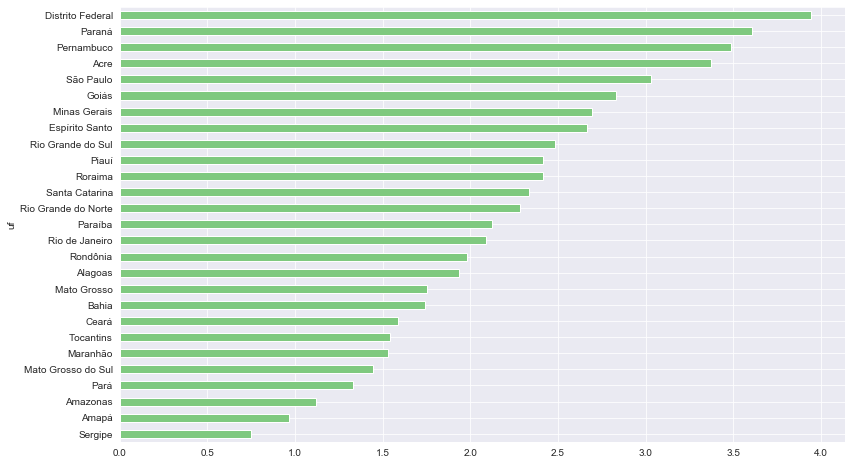

In [38]:
gasto_mensal_habitante['gasto por habitante'].sort_values(ascending = True).plot(kind = 'barh', figsize = (13,8))

In [39]:
import matplotlib.pyplot as plt

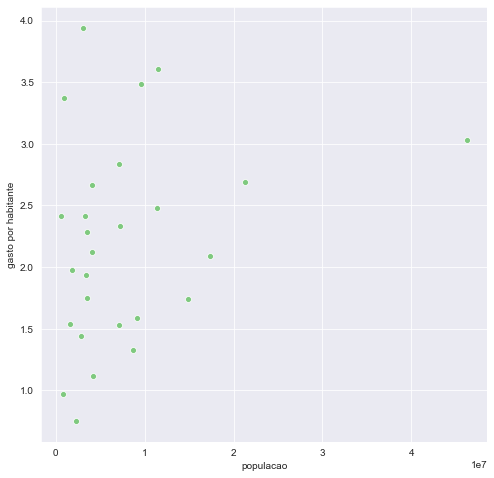

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = gasto_mensal_habitante, x = 'populacao', y = 'gasto por habitante')

# Parte III: Ticks Escala e Formatação de Imagem

In [41]:
dados_usaveis.index = dados_usaveis.index.str[3:]
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


In [42]:
dados_selecionados = dados_usaveis.iloc[:, 6:]
dados_selecionados.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,5.375967e+07,5.639165e+07,5.623376e+07,5.791017e+07,5.959212e+07,5.756574e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,4.410293e+07,4.434852e+07,4.248794e+07,4.306646e+07,4.455331e+07,4.135151e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


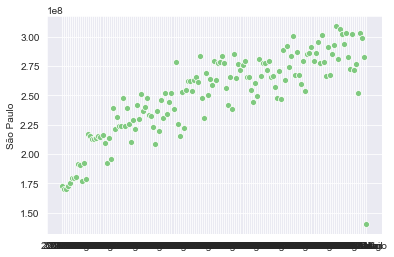

In [43]:
sns.scatterplot(x = dados_selecionados.columns, y = dados_selecionados.loc['São Paulo'])

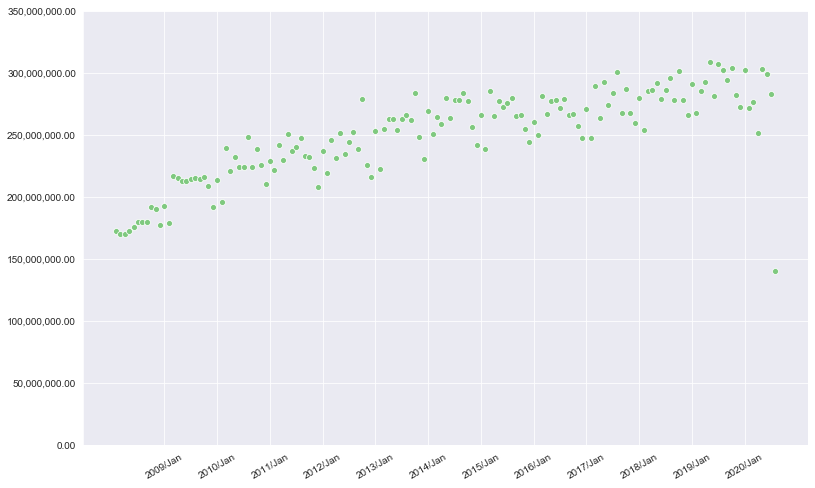

In [44]:
# jeito correto de utilizar

plt.figure(figsize=(13,8))
ax = sns.scatterplot(data = dados_selecionados.T, x = dados_selecionados.T.index , y = 'São Paulo')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
# Tambem poderiamos usar o AutoLocator(), que faz a separação das datas automaticamente
# A base é o quanto queremos "pular" dos dados no eixo fornecido, no caso aqui de 12 em 12 meses, e o offset e usado para selecionar o mês que desejamos começar
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
ax.set_ylim(0, 350000000)
plt.grid(True)
plt.show()

## Parte IV: Trabalhando com datetime e melt

In [45]:
import datetime

In [46]:
datetime.date.today()

datetime.date(2020, 12, 7)

In [47]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12,
}

In [48]:
def para_dia(ano_mes):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return datetime.date(ano, mes_numero, 1)

In [49]:
dados_selecionados.columns = dados_selecionados.columns.map(para_dia)

In [50]:
dados_selecionados.head()

,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,5.375967e+07,5.639165e+07,5.623376e+07,5.791017e+07,5.959212e+07,5.756574e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,4.410293e+07,4.434852e+07,4.248794e+07,4.306646e+07,4.455331e+07,4.135151e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


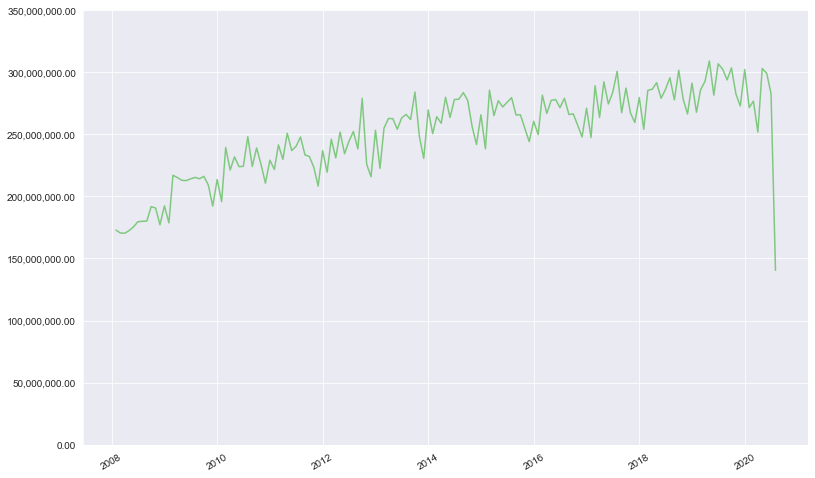

In [51]:
# Graças a tratativa de datetime, nao é necessário usar o major locator

plt.figure(figsize=(13,8))
ax = sns.lineplot(data = dados_selecionados.T, x = dados_selecionados.T.index , y = 'São Paulo')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.set_ylim(0, 350000000)
plt.grid(True)
plt.show()

#### Usando melt

In [52]:
mensal = dados_selecionados.T

In [53]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)

In [54]:
mensal_aberto.columns = ['dia_mes_ano','uf','gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')

In [55]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,1.728349e+08
1,2008-03-01,São Paulo,1.704818e+08
2,2008-04-01,São Paulo,1.702783e+08
3,2008-05-01,São Paulo,1.724022e+08
4,2008-06-01,São Paulo,1.754166e+08


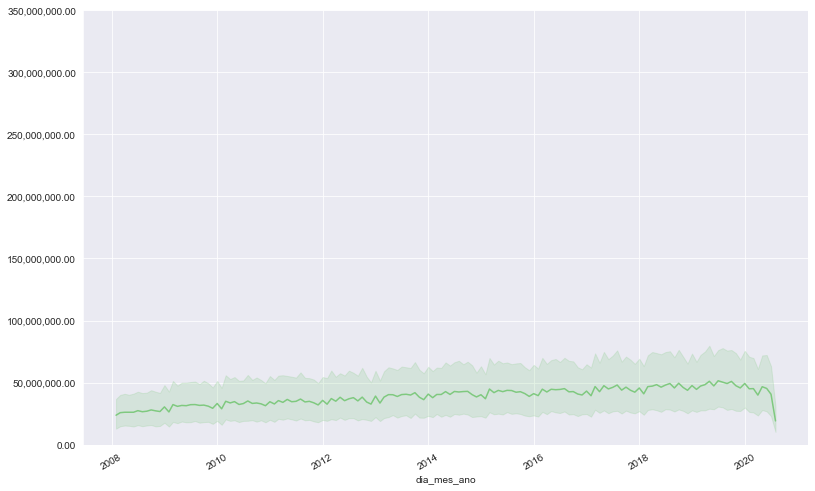

In [56]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(data = mensal_aberto, x = 'dia_mes_ano' , y = 'gasto')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.set_ylim(0, 350000000)
plt.grid(True)
plt.show()

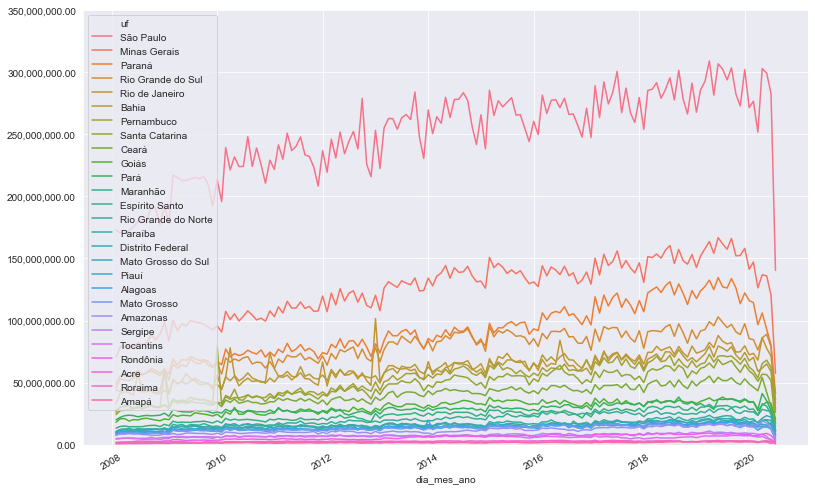

In [57]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(data = mensal_aberto, x = 'dia_mes_ano' , y = 'gasto', hue = 'uf')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.set_ylim(0, 350000000)
plt.grid(True)
plt.show()

# Parte V:  Tratamento de datas e gerando novas análises

In [58]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year

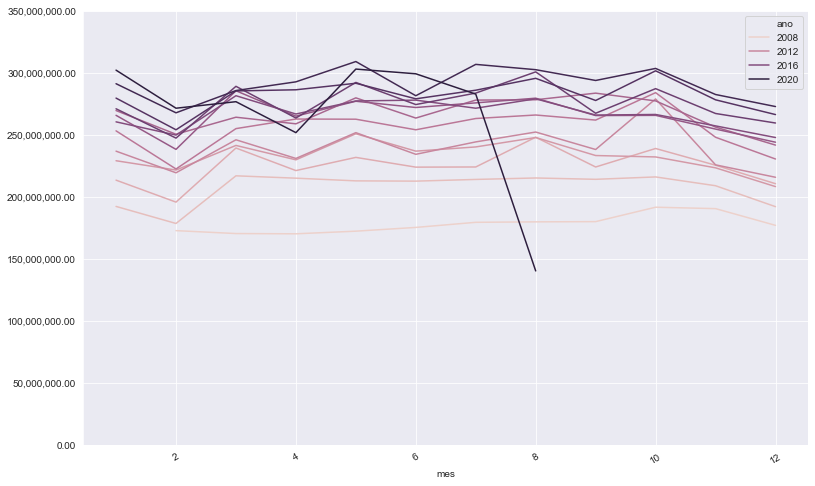

In [59]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(data = mensal_aberto.query("uf == 'São Paulo'"), x = 'mes' , y = 'gasto', hue = 'ano')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.set_ylim(0, 350000000)
plt.show()

In [60]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [61]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)

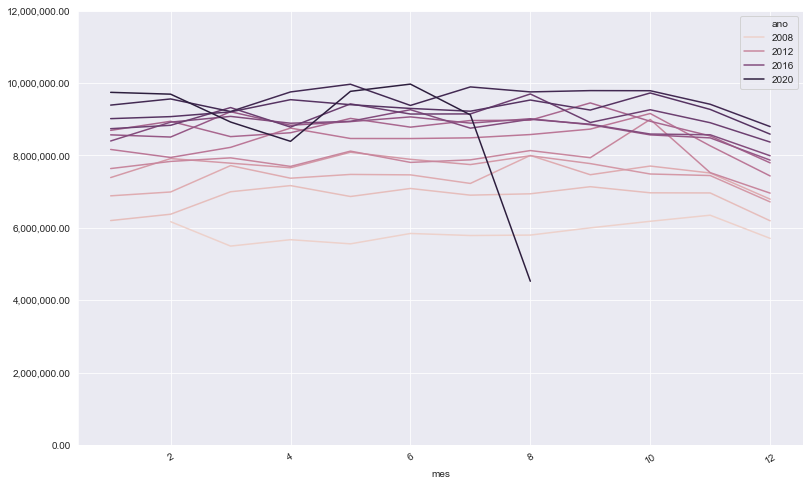

In [62]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(data = mensal_aberto.query("uf == 'São Paulo'"), x = 'mes' , y = 'gasto_diario', hue = 'ano')
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.set_ylim(0, 12000000)
plt.show()

# Parte VI: Agrupando dados e analisando por categoria

In [65]:
mes_para_analise = mensal_aberto.query("uf == 'São Paulo'")
mes_para_analise.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,1.728349e+08,2,2008,6.172676e+06
1,2008-03-01,São Paulo,1.704818e+08,3,2008,5.499415e+06
2,2008-04-01,São Paulo,1.702783e+08,4,2008,5.675943e+06
3,2008-05-01,São Paulo,1.724022e+08,5,2008,5.561361e+06
4,2008-06-01,São Paulo,1.754166e+08,6,2008,5.847220e+06


In [67]:
gastos_por_ano = mes_para_analise.groupby('ano').sum()

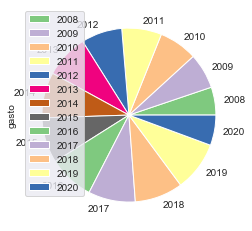

In [69]:
gastos_por_ano.plot(kind = 'pie', y = 'gasto')

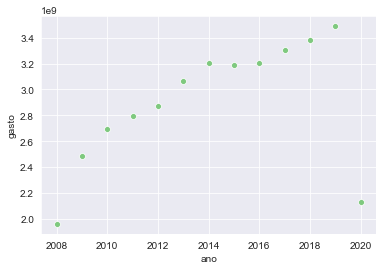

In [70]:
sns.scatterplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto')

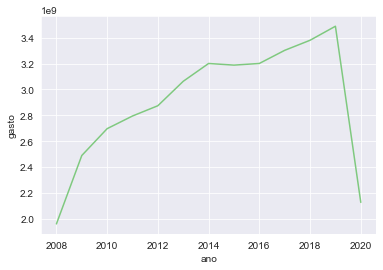

In [71]:
sns.lineplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto')

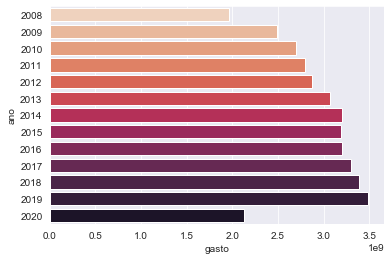

In [78]:
sns.barplot(data = gastos_por_ano, x = 'gasto', y = gastos_por_ano.index, orient = 'h', palette = sns.color_palette('rocket_r', 13))

In [81]:
estados = ['São Paulo', 'Minas Gerais', 'Pernambuco']
ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(['uf', 'ano']).sum().reset_index()

In [83]:
ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,8.943467e+08,77,2.944292e+07
1,Minas Gerais,2009,1.149141e+09,78,3.776744e+07
2,Minas Gerais,2010,1.217493e+09,78,4.002507e+07
3,Minas Gerais,2011,1.315022e+09,78,4.324253e+07
4,Minas Gerais,2012,1.408354e+09,78,4.629073e+07


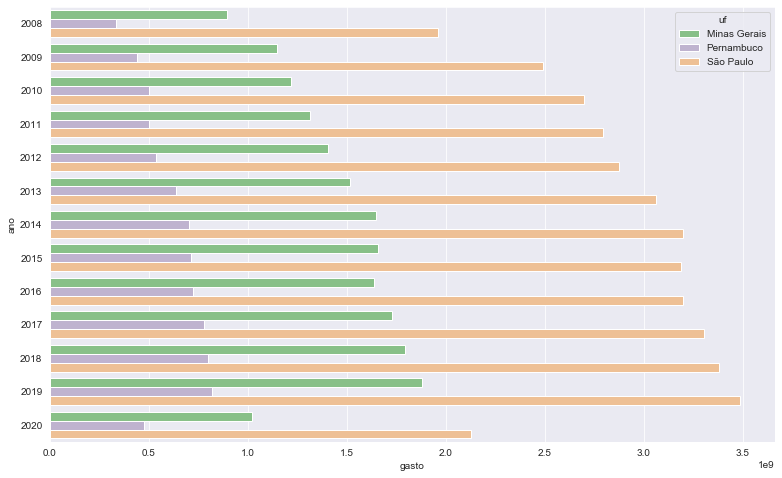

In [86]:
plt.figure(figsize=(13,8))
sns.barplot(data = ano_dos_estados, x = 'gasto', y = 'ano', orient = 'h', hue = 'uf')

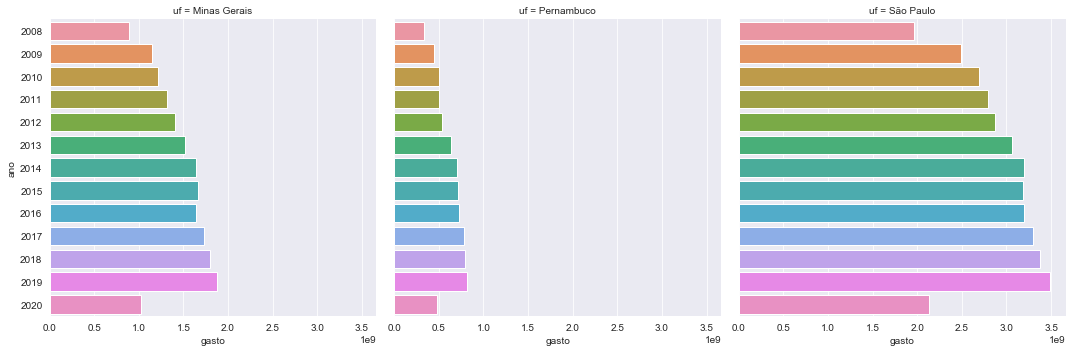

In [88]:
# Neste caso, colunas foi usado para determinar as categorias(estados), col = 'uf'
sns.catplot(data = ano_dos_estados, x = 'gasto', y = 'ano', orient = 'h', kind = 'bar', col = 'uf')